In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import datetime
from pandas_datareader import data

In [30]:
df = pd.read_csv('C:/final_data.csv')

In [31]:
df.head()

,Date,SPX,10D,20D,30D,50D,100D,200D
0,1/3/2007,1416.60,1420.40,1417.41,1410.84,1398.68,1359.39,1318.81
1,1/4/2007,1418.34,1419.99,1417.88,1411.41,1399.67,1360.86,1319.37
2,1/5/2007,1409.71,1418.40,1417.62,1411.72,1400.32,1362.29,1319.93
3,1/8/2007,1412.84,1417.33,1417.62,1412.06,1401.03,1363.73,1320.47
4,1/9/2007,1412.11,1416.71,1417.86,1412.26,1401.63,1365.00,1321.03


In [32]:
df.tail()

,Date,SPX,10D,20D,30D,50D,100D,200D
2594,4/24/2017,2374.15,2349.29,2353.50,2356.99,2358.74,2310.68,2235.58
2595,4/25/2017,2388.61,2352.43,2355.85,2357.49,2360.19,2312.52,2236.87
2596,4/26/2017,2387.45,2355.80,2357.29,2358.22,2361.38,2314.41,2238.12
2597,4/27/2017,2388.77,2360.18,2358.67,2358.34,2362.40,2316.38,2239.30
2598,4/28/2017,2384.20,2365.71,2359.48,2358.44,2363.10,2318.31,2240.46


In [33]:
df.describe()

,SPX,10D,20D,30D,50D,100D,200D
count,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000
mean,1541.795283,1540.139227,1538.342055,1536.520993,1532.802436,1523.520654,1505.685387
std,412.425301,410.533012,408.623842,406.699913,402.747810,393.432142,377.124381
min,676.530000,707.930000,736.970000,758.490000,788.960000,827.990000,870.570000
25%,1240.430000,1239.015000,1239.150000,1233.720000,1236.340000,1231.165000,1257.190000
50%,1443.690000,1443.490000,1439.790000,1435.640000,1429.730000,1427.090000,1418.110000
75%,1950.385000,1949.425000,1952.380000,1955.660000,1957.365000,1957.125000,1899.130000
max,2395.960000,2374.410000,2372.760000,2366.280000,2363.100000,2318.310000,2240.460000


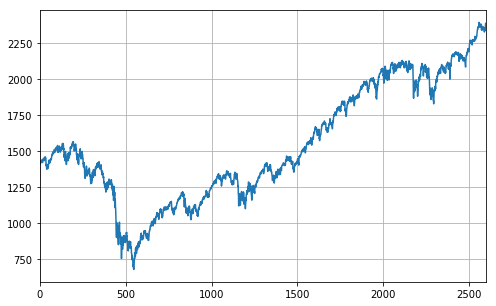

In [34]:
df['SPX'].plot(grid=True,figsize=(8,5))

Axes(0.125,0.125;0.775x0.755)


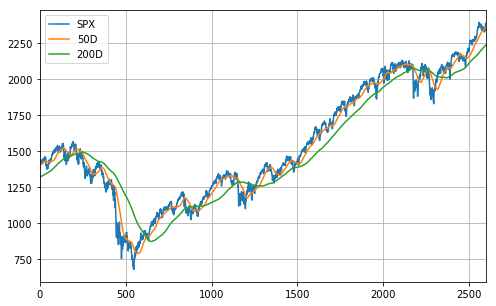

In [35]:
print df[['SPX', '50D','200D']].plot(grid=True,figsize=(8,5))

In [37]:
df['50D-200D'] = df['50D'] - df['200D']

X = 50
df['Position'] = np.where(df['50D-200D'] > X, 1, 0)
df['Position'] = np.where(df['50D-200D'] < X, -1, df['Position'])

In [38]:
print df['Position'].value_counts()

 1    1441
-1    1157
 0       1
Name: Position, dtype: int64


Axes(0.125,0.125;0.775x0.755)


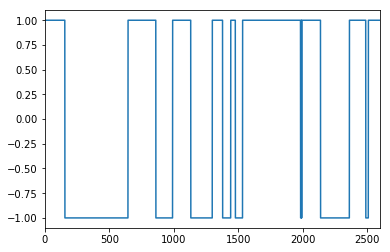

In [39]:
print df['Position'].plot(lw=1.5,ylim=[-1.1,1.1])

In [40]:
df['Market Returns'] = np.log(df['SPX'] / df['SPX'].shift(1))
df['Strategy'] = df['Market Returns'] * df['Position'].shift(1)

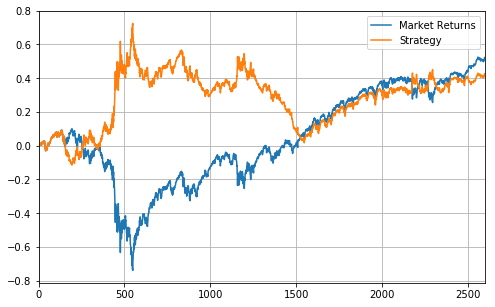

In [41]:
df[['Market Returns', 'Strategy']].cumsum().plot(grid=True, figsize=(8,5))